In [105]:
import requests
import re
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xlsx = pd.ExcelFile('TJ_list.xlsx')
tj_players = pd.read_excel(xlsx, 'TJ List')

In [3]:
tj_players.head()

,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,...,IP,K-BB%,ERA-,FIP-,G.1,GS.1,IP.1,K-BB%.1,ERA-.1,FIP-.1
0,Colin Rea,2016-11-10,SD,MLB,P,R,United States,Iowa,Indiana State,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bryan Harper,2016-11-08,WAS,AAA,P,L,United States,Nevada,"Southern Nevada, South Carolina",26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yimi Garcia,2016-10-25,LAD,AA,P,R,Dominican,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Cook,2016-10-20,SEA,Rk,P,R,United States,California,USC,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J.B. Wendelken,2016-10-12,OAK,MLB,P,R,United States,Georgia,Middle Georgia,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tj_players.columns

Index([u'Player', u'TJ Surgery Date', u'Team', u'Level', u'Position',
       u'Throws', u'Country', u'High School', u'College(s)', u'Age',
       u'Return Date (same level)', u'Recovery Time (months)', u'mlbamid',
       u'fgid', u'Surgeon(s)', u'Post-TJ MLB G', u'Post-TJ MLB IP/PA',
       u'Active', u'Year', u'Month', u'Started\nThrowing', u'Mound',
       u'Bullpen', u'Live\nHitters', u'Game', u'Setback', u'Setback Type',
       u'Setback.1', u'Setback Type.1', u'G', u'GS', u'IP', u'K-BB%', u'ERA-',
       u'FIP-', u'G.1', u'GS.1', u'IP.1', u'K-BB%.1', u'ERA-.1', u'FIP-.1'],
      dtype='object')

In [5]:
tj_players.isnull().sum()

Player                         0
TJ Surgery Date                0
Team                           0
Level                          0
Position                       0
Throws                         0
Country                        0
High School                  289
College(s)                   569
Age                            0
Return Date (same level)     295
Recovery Time (months)       723
mlbamid                       14
fgid                          42
Surgeon(s)                   876
Post-TJ MLB G                  0
Post-TJ MLB IP/PA              0
Active                         0
Year                           0
Month                          0
Started\nThrowing           1321
Mound                       1329
Bullpen                     1325
Live\nHitters               1324
Game                        1311
Setback                     1317
Setback Type                1317
Setback.1                   1330
Setback Type.1              1330
G                           1276
GS        

In [6]:
del tj_players['High School']
del tj_players['College(s)']
del tj_players['Return Date (same level)']
del tj_players['Recovery Time (months)']
del tj_players['mlbamid']
del tj_players['Surgeon(s)']
del tj_players['Started\nThrowing']
del tj_players['Mound']
del tj_players['Bullpen']
del tj_players['Live\nHitters']
del tj_players['Game']
del tj_players['Setback']
del tj_players['Setback Type']
del tj_players['Setback.1']
del tj_players['Setback Type.1']
del tj_players['G']
del tj_players['GS']
del tj_players['IP']
del tj_players['K-BB%']
del tj_players['ERA-']
del tj_players['FIP-']
del tj_players['G.1']
del tj_players['GS.1']
del tj_players['IP.1']
del tj_players['K-BB%.1']
del tj_players['ERA-.1']
del tj_players['FIP-.1']


In [11]:
tj_players.head()

,player,tj_surgery_date,team,level,position,throws,country,age,fgid,post-tj_mlb_g,post-tj_mlb_ip/pa,active,year,month,tjs
0,Colin Rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11,1
1,Bryan Harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11,1
2,Yimi Garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10,1
3,Ryan Cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10,1
4,J.B. Wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10,1


In [8]:
tj_players.isnull().sum()

Player                0
TJ Surgery Date       0
Team                  0
Level                 0
Position              0
Throws                0
Country               0
Age                   0
fgid                 42
Post-TJ MLB G         0
Post-TJ MLB IP/PA     0
Active                0
Year                  0
Month                 0
dtype: int64

In [9]:
tj_players['tjs'] = 1

In [10]:
tj_players.columns = [i.replace(' ','_').lower() for i in tj_players.columns]

In [16]:
tj_players['player']=tj_players['player'].apply(lambda x: x.replace(' ','_').lower())

In [17]:
tj_players.head()

,player,tj_surgery_date,team,level,position,throws,country,age,fgid,post-tj_mlb_g,post-tj_mlb_ip/pa,active,year,month,tjs
0,colin_rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11,1
1,bryan_harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11,1
2,yimi_garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10,1
3,ryan_cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10,1
4,j.b._wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10,1


In [18]:
tj_players['player']=tj_players['player'].apply(lambda x: x.replace('.',''))

In [19]:
tj_players.head()

,player,tj_surgery_date,team,level,position,throws,country,age,fgid,post-tj_mlb_g,post-tj_mlb_ip/pa,active,year,month,tjs
0,colin_rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11,1
1,bryan_harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11,1
2,yimi_garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10,1
3,ryan_cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10,1
4,jb_wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10,1


In [21]:
tj_players.to_csv('tj_list.csv', encoding ='utf-8')

In [22]:
fg_info1 = pd.read_csv('../Data/pitchers_standard_2015.csv')

In [25]:
fg_info2 = pd.read_csv('../Data/pitchers_advanced_2015.csv')

In [26]:
fg_info3 = pd.read_csv('../Data/pitchers_battedball_2015.csv')

In [27]:
fg_info4 = pd.read_csv('../Data/pitchers_pitchfxhmov_2015.csv')

In [28]:
fg_info5 = pd.read_csv('../Data/pitchers_pitchfxvmov_2015.csv')

In [29]:
fg_info6 = pd.read_csv('../Data/pitchers_pitchfxplatedisci_2015.csv')

In [30]:
fg_info7 = pd.read_csv('../Data/pitchers_pitchfxvelo_2015.csv')

In [31]:
fg_info8 = pd.read_csv('../Data/pitchers_pitchfxtype_2015.csv')

In [33]:
fg_info9 = pd.read_csv('../Data/pitchers_pitchtype_2015.csv')

In [34]:
fg_info10 = pd.read_csv('../Data/pitchers_pitchvalue_2015.csv')

In [35]:
fg_info11 = pd.read_csv('../Data/pitchers_platedisci_2015.csv')

In [43]:
fg_info2.shape

(328, 22)

In [44]:
merge1 = fg_info1.merge(fg_info2,on='playerid')
merge2 = merge1.merge(fg_info3,on='playerid')
merge3 = merge2.merge(fg_info4,on='playerid')
merge4 = merge3.merge(fg_info5,on='playerid')
merge5 = merge4.merge(fg_info6,on='playerid')
merge6 = merge5.merge(fg_info7,on='playerid')
merge7 = merge6.merge(fg_info8,on='playerid')
merge8 = merge7.merge(fg_info9,on='playerid')
merge9 = merge8.merge(fg_info10,on='playerid')
pitchers_2015 = merge9.merge(fg_info11,on='playerid')

In [45]:
pitchers_2015.shape

(328, 186)

In [46]:
pitchers_2015.to_csv('pitchers_2015.csv')

In [67]:
tj_dict = {}
for index, row in tj_players.iterrows():
    tj_dict[str(row['fgid'])] = {'year':int(row['year']),
                           'month':int(row['month']),
                           'age': int(row['age'])
                           }

In [68]:
tj_dict

{'1142': {'age': 23, 'month': 7, 'year': 2003},
 'sa828659': {'age': 18, 'month': 3, 'year': 2015},
 '1718': {'age': 23, 'month': 11, 'year': 2004},
 'sa505589': {'age': 24, 'month': 1, 'year': 2013},
 '9073': {'age': 19, 'month': 1, 'year': 2006},
 'sa553380': {'age': 23, 'month': 5, 'year': 2012},
 '452': {'age': 31, 'month': 1, 'year': 2006},
 'sa701852': {'age': 23, 'month': 1, 'year': 2015},
 '14914': {'age': 19, 'month': 8, 'year': 2011},
 '11543': {'age': 20, 'month': 1, 'year': 2009},
 'sa549763': {'age': 24, 'month': 3, 'year': 2016},
 '57': {'age': 30, 'month': 7, 'year': 2006},
 '13300': {'age': 22, 'month': 1, 'year': 2013},
 'sa597117': {'age': 20, 'month': 5, 'year': 2014},
 '1060': {'age': 24, 'month': 8, 'year': 2001},
 'sa549768': {'age': 26, 'month': 11, 'year': 2016},
 '14077': {'age': 24, 'month': 10, 'year': 2013},
 '4782': {'age': 21, 'month': 7, 'year': 2006},
 'sa875195': {'age': 20, 'month': 8, 'year': 2016},
 '12520': {'age': 26, 'month': 10, 'year': 2016},
 '

In [ ]:
pitchers_2015['playerid'] = pitchers_2015['playerid'].apply(lambda x: str(x))

In [84]:
for index, row in pitchers_2015.iterrows():
    if str(row['playerid']) in tj_dict and tj_dict[row['playerid']]['year'] == 2016:
        pitchers_2015.loc[index, 'tj'] = 1
    else:
        pitchers_2015.loc[index, 'tj'] = 0

In [132]:
for index, row in pitchers_2015.iterrows():
    if row['playerid'] in tj_dict:
        pitchers_2015.loc[index, 'prev_tj'] = 1
    else:
        pitchers_2015.loc[index, 'prev_tj'] = 0

In [102]:
tj_players[tj_players['level'] == 'MLB'].year.value_counts()

2012    36
2014    31
2015    27
2007    22
2013    20
2009    20
2006    20
2003    19
2016    19
2011    17
2010    17
2005    17
2000    16
2008    15
2002    15
2001    15
2004    13
1995    10
1999    10
1998     8
1994     6
1993     6
1991     6
1997     5
1996     5
1992     4
1989     4
1986     4
1988     3
1982     3
1990     2
1984     2
1983     1
1978     1
1974     1
Name: year, dtype: int64

In [133]:
pitchers_2015[pitchers_2015['prev_tj'] == 1]

,"﻿""Name""_x",Team_x,W,L,ERA_x,G,GS,CG,ShO,SV,...,Z-Swing%_y,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,tj,prev_tj
5,Hector Rondon,Cubs,6,4,1.67,72,0,0,0,30,...,70.8 %,49.2 %,59.0 %,88.2 %,77.8 %,44.7 %,63.7 %,10.8 %,0.0,1.0
10,Will Harris,Astros,5,5,1.90,68,0,0,0,2,...,67.0 %,44.4 %,65.2 %,89.7 %,81.0 %,42.7 %,59.8 %,8.4 %,0.0,1.0
14,Tony Sipp,Astros,3,4,1.99,60,0,0,0,0,...,70.2 %,49.0 %,53.3 %,82.2 %,70.4 %,41.5 %,64.8 %,14.4 %,0.0,1.0
19,Ryan Madson,Royals,1,2,2.13,68,0,0,0,3,...,67.8 %,49.7 %,60.8 %,80.1 %,73.4 %,48.0 %,66.5 %,13.1 %,0.0,1.0
21,Alex Wilson,Tigers,3,3,2.19,59,1,0,0,2,...,67.7 %,51.3 %,74.0 %,93.0 %,86.5 %,49.9 %,62.6 %,6.9 %,0.0,1.0
23,Mark Melancon,Pirates,3,2,2.23,78,0,0,0,51,...,66.4 %,50.4 %,64.0 %,87.1 %,76.5 %,41.0 %,62.5 %,11.8 %,0.0,1.0
25,A.J. Ramos,Marlins,2,4,2.30,71,0,0,0,32,...,66.2 %,46.7 %,44.6 %,82.4 %,65.8 %,39.5 %,59.2 %,16.0 %,0.0,1.0
26,Carson Smith,Mariners,2,5,2.31,70,0,0,0,13,...,55.0 %,41.2 %,41.0 %,86.8 %,69.2 %,46.1 %,58.8 %,12.5 %,1.0,1.0
28,George Kontos,Giants,4,4,2.33,73,0,0,0,0,...,73.4 %,52.3 %,64.7 %,88.6 %,80.6 %,47.2 %,58.5 %,10.1 %,0.0,1.0
33,Jaime Garcia,Cardinals,10,6,2.43,20,20,0,0,0,...,67.2 %,48.0 %,62.2 %,89.8 %,80.8 %,48.1 %,58.8 %,9.2 %,0.0,1.0


In [135]:
pitchers_2015.corr()

,W,L,ERA_x,G,GS,CG,ShO,SV,HLD,BS,...,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,tj,prev_tj
W,1.000000,0.511359,-0.117703,-0.333881,0.794253,0.539252,0.439991,-0.234868,-0.340389,-0.384912,...,1.0,0.096534,-0.010976,0.027563,0.163167,0.049393,0.258739,1.0,-0.105665,0.031156
L,0.511359,1.000000,0.329370,-0.417076,0.779656,0.359135,0.282388,-0.239410,-0.375650,-0.390149,...,1.0,-0.228964,-0.129109,-0.183405,-0.043170,-0.053449,0.263543,1.0,-0.030814,-0.019314
ERA_x,-0.117703,0.329370,1.000000,-0.475216,0.237060,-0.069501,-0.068719,-0.361723,-0.330075,-0.347319,...,-1.0,-0.660709,-0.328169,-0.387438,-0.288881,-0.164058,0.088629,-1.0,-0.020538,-0.059005
G,-0.333881,-0.417076,-0.475216,1.000000,-0.672403,-0.228225,-0.168802,0.446333,0.748606,0.761842,...,1.0,0.383599,0.171787,0.244068,-0.070398,0.109188,-0.271234,1.0,0.011116,0.050480
GS,0.794253,0.779656,0.237060,-0.672403,1.000000,0.480316,0.376889,-0.375948,-0.600861,-0.656212,...,1.0,-0.189341,-0.109013,-0.173719,0.071242,-0.008358,0.322069,1.0,-0.067701,-0.011452
CG,0.539252,0.359135,-0.069501,-0.228225,0.480316,1.000000,0.814379,-0.145032,-0.240707,-0.263985,...,1.0,0.046559,0.094261,0.050295,0.188566,0.045329,0.049627,1.0,-0.055644,-0.072265
ShO,0.439991,0.282388,-0.068719,-0.168802,0.376889,0.814379,1.000000,-0.112375,-0.186122,-0.204579,...,NaN,0.113239,0.042153,0.031214,0.135845,-0.005155,0.027800,NaN,-0.043122,-0.089283
SV,-0.234868,-0.239410,-0.361723,0.446333,-0.375948,-0.145032,-0.112375,1.000000,0.010452,0.545790,...,NaN,0.219465,0.168569,0.379659,0.039230,0.081211,0.109242,NaN,-0.010322,0.030104
HLD,-0.340389,-0.375650,-0.330075,0.748606,-0.600861,-0.240707,-0.186122,0.010452,1.000000,0.596842,...,NaN,0.301533,0.128286,0.110972,-0.126028,0.076830,-0.414145,NaN,0.091647,0.039447
BS,-0.384912,-0.390149,-0.347319,0.761842,-0.656212,-0.263985,-0.204579,0.545790,0.596842,1.000000,...,NaN,0.314733,0.121575,0.174699,-0.022587,-0.029517,-0.253872,NaN,0.066242,0.031017


In [136]:
for n in range(0,len(pitchers_2015.corr()['tj'])):
    if pitchers_2015.corr()['tj'][n] > 0.1:
        print n

46
50
62
78
110
111


In [137]:
print pitchers_2015.corr()['tj'][46:47]
print pitchers_2015.corr()['tj'][50:51]
print pitchers_2015.corr()['tj'][62:63]
print pitchers_2015.corr()['tj'][78:79]
print pitchers_2015.corr()['tj'][110:111]
print pitchers_2015.corr()['tj'][111:112]

FT-X    0.148066
Name: tj, dtype: float64
SI-X    0.14344
Name: tj, dtype: float64
FS-Z    0.274148
Name: tj, dtype: float64
vFS    0.187539
Name: tj, dtype: float64
tj    1.0
Name: tj, dtype: float64
prev_tj    0.242345
Name: tj, dtype: float64


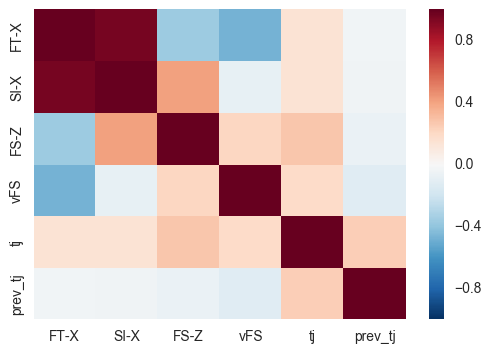

In [139]:

sns.heatmap(pitchers_2015[['FT-X','SI-X','FS-Z','vFS','tj','prev_tj']].corr())